In [1]:
#import libraries
from __future__ import print_function
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import random
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

In [2]:
!gdown 1ddEF8hpLR_ueDCR5nDo9ewEuHpxl9ndN

Downloading...
From: https://drive.google.com/uc?id=1ddEF8hpLR_ueDCR5nDo9ewEuHpxl9ndN
To: /content/crop_recommendation.csv
100% 271k/271k [00:00<00:00, 96.9MB/s]


In [3]:
df = pd.read_csv('/content/crop_recommendation.csv')

In [4]:
df

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...,...
3855,2095,87,44,43,23.874845,86.792613,6.718725,177.514731,jute
3856,2096,88,52,39,23.928879,88.071123,6.880205,154.660874,jute
3857,2097,90,39,37,24.814412,81.686889,6.861069,190.788639,jute
3858,2098,90,39,43,24.447439,82.286484,6.769346,190.968489,jute


In [5]:
#drop unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
3855,87,44,43,23.874845,86.792613,6.718725,177.514731,jute
3856,88,52,39,23.928879,88.071123,6.880205,154.660874,jute
3857,90,39,37,24.814412,81.686889,6.861069,190.788639,jute
3858,90,39,43,24.447439,82.286484,6.769346,190.968489,jute


In [7]:
#number of rows in every category
df.label.value_counts()

banana         280
watermelon     280
mango          260
rice           240
pigeonpeas     240
mothbeans      240
blackgram      240
lentil         240
pomegranate    240
muskmelon      240
papaya         240
coconut        240
maize          220
mungbean       220
cotton         220
jute           220
Name: label, dtype: int64

In [8]:
#description of dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000
mean,55.935492,45.344819,32.974093,26.912405,75.505741,6.456701,102.054813
std,37.624903,21.974284,13.094247,4.222236,15.883727,0.777649,60.976673
min,0.000000,5.000000,15.000000,18.041855,30.400468,3.504752,20.000000
25%,23.000000,26.000000,21.000000,24.398853,63.393247,6.000000,54.239733
50%,45.000000,47.000000,32.000000,26.667722,80.709189,6.441832,91.521290
75%,90.000000,61.000000,45.000000,29.031572,88.729175,6.980401,134.846342
max,140.000000,95.000000,55.000000,44.000000,99.981876,10.000000,298.560117


In [9]:
df.shape

(3860, 8)

In [10]:
# To check whether there null values or not using the useful function Assert
assert df.isnull().sum().sum() == 0

In [11]:
# Eliminating all duplicated rows with drop_duplicates
df.drop_duplicates(inplace= True)

In [12]:
#number of rows in every category
df.label.value_counts()

banana         180
watermelon     180
mango          160
rice           140
pigeonpeas     140
mothbeans      140
blackgram      140
lentil         140
pomegranate    140
muskmelon      140
papaya         140
coconut        140
maize          120
mungbean       120
cotton         120
jute           120
Name: label, dtype: int64

In [13]:
# To check wether there duplicated values or not using the useful function Assert
assert df.duplicated().sum() == 0

In [14]:
# description of dataset after drop all null and duplicate values
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2260.000000,2260.00000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000
mean,56.308407,45.29646,33.338053,26.948501,75.470661,6.449085,101.765575
std,37.656752,22.30688,13.143532,4.223495,15.953257,0.777079,60.751083
min,0.000000,5.00000,15.000000,18.041855,30.400468,3.504752,20.000000
25%,23.750000,25.00000,21.000000,24.415225,63.386295,6.000000,54.028381
50%,46.500000,47.00000,32.000000,26.795475,80.719235,6.427890,91.880393
75%,91.000000,61.00000,46.000000,29.030294,88.717139,7.000000,131.069138
max,140.000000,95.00000,55.000000,44.000000,99.981876,10.000000,298.560117


In [15]:
# after drop all null and duplicate values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 3759
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2260 non-null   int64  
 1   P            2260 non-null   int64  
 2   K            2260 non-null   int64  
 3   temperature  2260 non-null   float64
 4   humidity     2260 non-null   float64
 5   ph           2260 non-null   float64
 6   rainfall     2260 non-null   float64
 7   label        2260 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 158.9+ KB


In [16]:
# feature_Selection
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [17]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.20,random_state =42)

In [19]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  96.23893805309734
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        34
   blackgram       0.84      1.00      0.92        27
     coconut       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        25
        jute       0.80      0.96      0.87        25
      lentil       0.81      1.00      0.89        21
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.64      0.78        28
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        30
      papaya       1.00      1.00      1.00        30
  pigeonpeas       1.00      1.00      1.00        31
 pomegranate       1.00      1.00      1.00        24
        rice       0.96      0.79      0.86        28
  watermelon       1.00      1.00      1.00        33

    accuracy                    

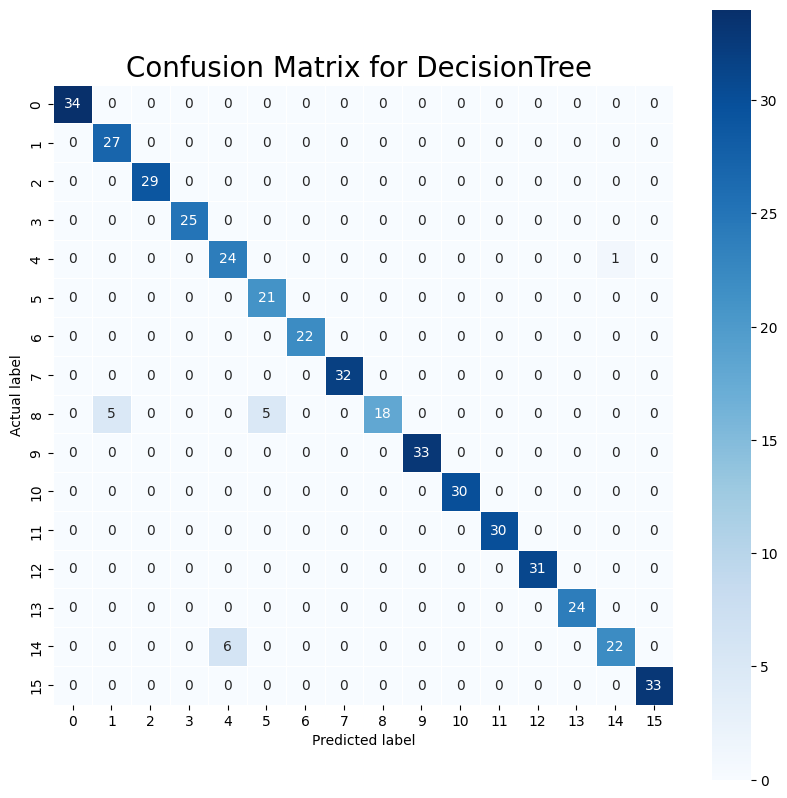

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title(f'Confusion Matrix for DecisionTree ', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [21]:
#Cross_Validation_To_detect_Model_Overfitting
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.97566372, 0.94690265, 0.9579646 , 0.96238938, 0.98230088])

In [22]:
SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.19690265486725664
              precision    recall  f1-score   support

      banana       0.09      1.00      0.16        34
   blackgram       1.00      0.04      0.07        27
     coconut       0.00      0.00      0.00        29
      cotton       1.00      0.04      0.08        25
        jute       1.00      0.04      0.08        25
      lentil       0.00      0.00      0.00        21
       maize       0.00      0.00      0.00        22
       mango       1.00      0.31      0.48        32
   mothbeans       0.00      0.00      0.00        28
    mungbean       0.00      0.00      0.00        33
   muskmelon       1.00      0.30      0.46        30
      papaya       0.00      0.00      0.00        30
  pigeonpeas       0.00      0.00      0.00        31
 pomegranate       1.00      0.08      0.15        24
        rice       0.00      0.00      0.00        28
  watermelon       1.00      0.94      0.97        33

    accuracy                           0

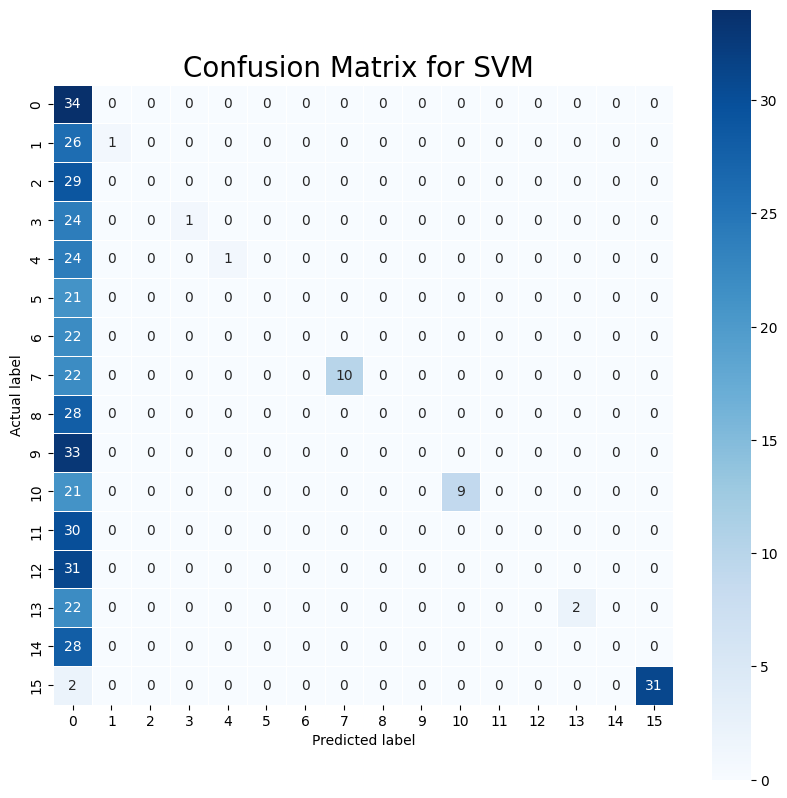

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title(f'Confusion Matrix for SVM ', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.15486726, 0.17035398, 0.18141593, 0.2079646 , 0.19911504])

In [25]:
LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9491150442477876
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        34
   blackgram       0.96      0.85      0.90        27
     coconut       1.00      1.00      1.00        29
      cotton       0.89      0.96      0.92        25
        jute       0.88      0.88      0.88        25
      lentil       0.91      0.95      0.93        21
       maize       0.94      0.77      0.85        22
       mango       1.00      1.00      1.00        32
   mothbeans       0.80      0.86      0.83        28
    mungbean       0.94      0.97      0.96        33
   muskmelon       1.00      1.00      1.00        30
      papaya       1.00      0.93      0.97        30
  pigeonpeas       0.97      1.00      0.98        31
 pomegranate       1.00      1.00      1.00        24
        rice       0.87      0.93      0.90        28
  watermelon       1.00      1.00      1.00        33

    accuracy             

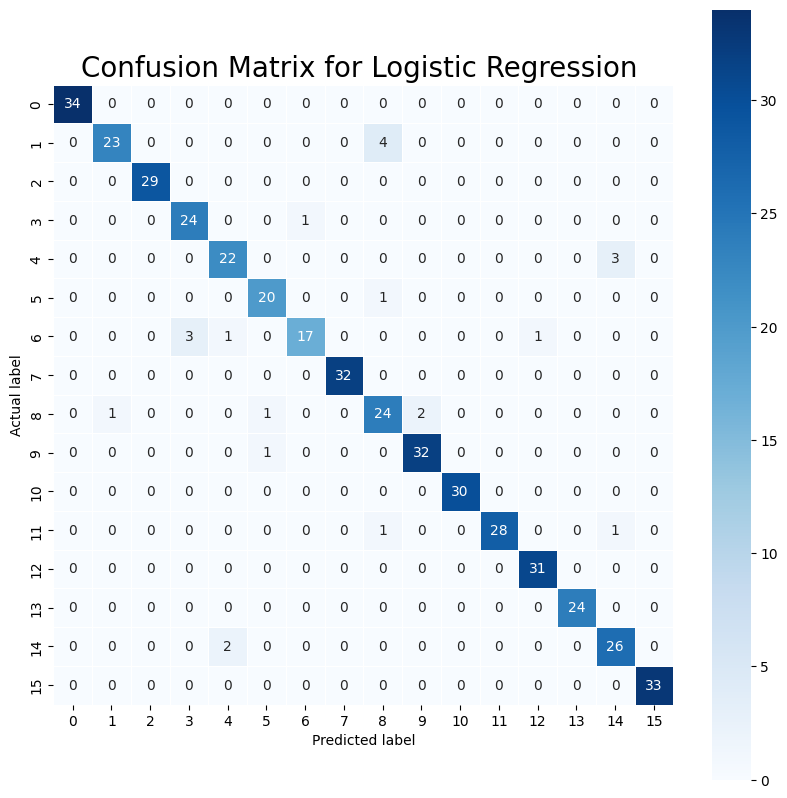

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title(f'Confusion Matrix for Logistic Regression ', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.94911504, 0.94690265, 0.95353982, 0.94911504, 0.96238938])

In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [29]:
tf.random.set_seed

<function tensorflow.python.framework.random_seed.set_seed(seed)>

In [30]:
train_accuracy = {}
test_accuracy = {}

In [31]:
labels = df['label'].unique()
labeled_data = {}
j=0
for i in labels:
  labeled_data[i] = j
  j+=1

In [32]:
label_values = list(labeled_data.values())

In [34]:
#encoded labels into a number
df['label_encoded'] = df.label.map(labeled_data)

In [35]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0
...,...,...,...,...,...,...,...,...,...
3755,88,39,38,24.000000,80.513389,7.000000,183.335128,jute,15
3756,100,51,36,25.000000,73.188079,7.000000,187.809005,jute,15
3757,82,49,44,23.000000,76.579815,7.000000,188.980021,jute,15
3758,67,53,44,24.000000,78.449392,6.000000,156.329482,jute,15


In [36]:
X = df.drop(['label','label_encoded'],axis=1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [37]:
y = df['label_encoded']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label_encoded, dtype: int64

In [38]:
sc = StandardScaler()

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [40]:
#StandardScaler used
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [42]:
#two hidden layer with 15 and 64 neuron activation of reLu, a output layer activation of softmax
model = tf.keras.Sequential()
model.add(keras.layers.Dense(22,input_shape=(7,), activation='relu'))
model.add(keras.layers.Dense(64,input_shape=(7,), activation='relu'))
model.add(keras.layers.Dense(16,input_shape=(7,), activation='softmax'))

In [43]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                176       
                                                                 
 dense_1 (Dense)             (None, 64)                1472      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
Total params: 2688 (10.50 KB)
Trainable params: 2688 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


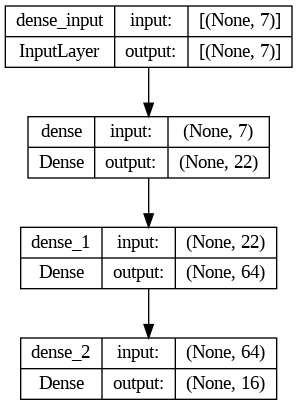

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [46]:
history = model.fit(x=X_train, y = y_train, validation_split=0.30,epochs=100,batch_size=50)

Epoch 1/100
26/26 [==============================] - 1s 12ms/step - loss: 2.6454 - accuracy: 0.1945 - val_loss: 2.4640 - val_accuracy: 0.4033
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 2.3008 - accuracy: 0.5083 - val_loss: 2.0939 - val_accuracy: 0.5672
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 1.8969 - accuracy: 0.6213 - val_loss: 1.6527 - val_accuracy: 0.6722
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 1.4574 - accuracy: 0.7328 - val_loss: 1.2306 - val_accuracy: 0.7532
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 1.0706 - accuracy: 0.8055 - val_loss: 0.9081 - val_accuracy: 0.7956
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7993 - accuracy: 0.8356 - val_loss: 0.6960 - val_accuracy: 0.8692
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0.8870 - val_loss: 0.5551 - val_accuracy: 0.9079
Epoch 8/100


In [47]:
!pip uninstall matplotlib

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.7.1


In [48]:
!pip install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=11756965 sha256=2e01201be6e61c12453c548a9bca2ea4010e1a394c094f496fc040303a41dc9a
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.9.3 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which

In [ ]:
eval = model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 7ms/step - loss: 0.0410 - accuracy: 0.9845


In [ ]:
train_accuracy['ANN model'] = history.history['accuracy'][-1]*100
test_accuracy['ANN model'] = eval[-1]*100

In [ ]:
train_accuracy

{'ANN model': 99.05138611793518}

In [ ]:
test_accuracy

{'ANN model': 98.45132827758789}

In [ ]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

15/15 [==============================] - 0s 6ms/step


In [ ]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        33
           5       0.96      0.96      0.96        27
           6       0.95      0.95      0.95        21
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        32
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        25
          15       0.95      0.84      0.89        25

    accuracy                           0.98       452
   macro avg       0.98   

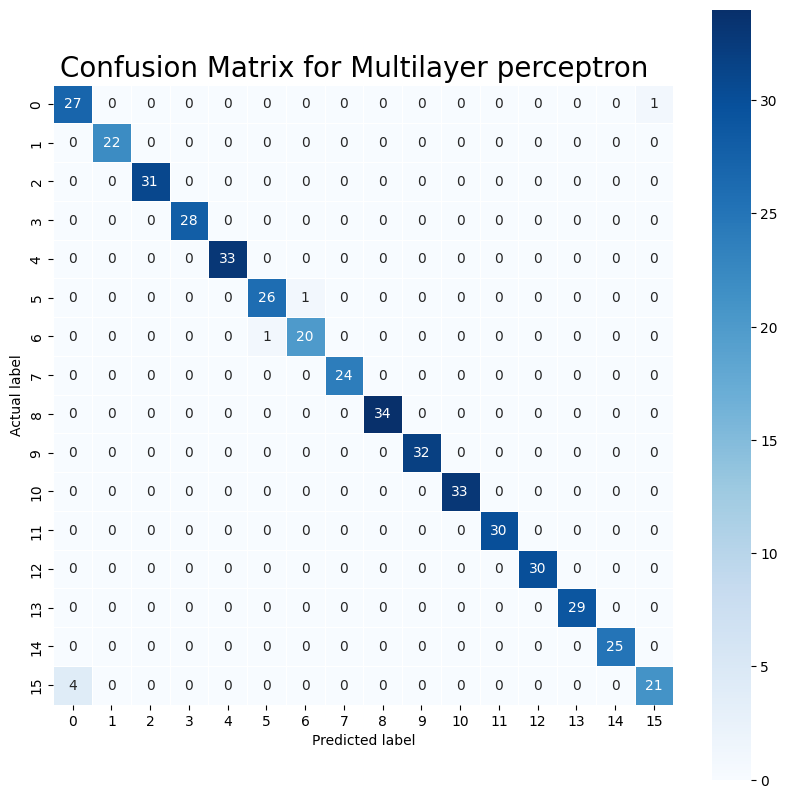

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test,classes_x), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title(f'Confusion Matrix for Multilayer perceptron  ', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()